/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


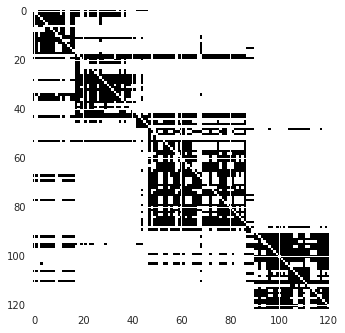

In [1]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
m = pickle.load( open("bool_matrix.p", "rb"))

exc = pickle.load( open("graph_excit.p", "rb"))
inh = pickle.load( open("graph_inhib.p", "rb"))


assert np.sum(inh) > np.sum(exc)
#for i in inh:
#    if 
#    print(i.asInt())
#print([float(i) for i in inh])
m = exc + inh
csv_connectivity = m.astype(int)

plt.figure()
plt.show()
plt.imshow(csv_connectivity)

import pandas as pd
pd.DataFrame(csv_connectivity).to_csv('digitaL_connectivity.csv', index=False)


In [2]:
m[0:17][:]

array([[False, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ..., 
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]], dtype=bool)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


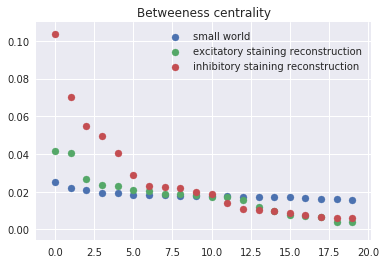

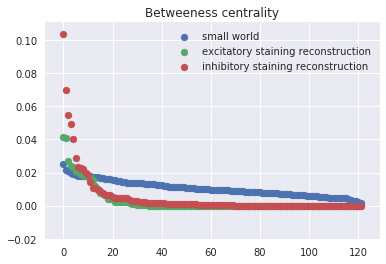

In [3]:
dg = m[0:17][:]
ca3 = m[18:42][:]
ca2 = m[43:47][:]
ca1 = m[48:87][:]
sub = m[88:90][:]
ec = m[91:122][:]



G = nx.DiGraph(exc)
Gi = nx.DiGraph(inh)

in_degree = G.in_degree()
top_in = sorted(([ (v,k) for k, v in in_degree.items() ]))
in_hub = top_in[-1][1]
out_degree = G.out_degree()
top_out = sorted(([ (v,k) for k, v in out_degree.items() ]))
out_hub = top_out[-1][1]
mean_out = np.mean(list(out_degree.values()))
mean_in = np.mean(list(in_degree.values()))

mean_conns = int(mean_in + mean_out/2)

k = 2 # number of neighbouig nodes to wire.
p = 0.25 # probability of instead wiring to a random long range destination.
ne = len(exc)# size of small world network
small_world_ring_excit = nx.watts_strogatz_graph(ne,mean_conns,0.25)


#k = 2 # number of neighbouring nodes to wire.
#p = 0.25 # probability of instead wiring to a random long range destination.
#ni = len(inh)# size of small world network
#small_world_ring_inhib   = nx.watts_strogatz_graph(ni,mean_conns,0.25)


sw = nx.betweenness_centrality(small_world_ring_excit)
sexc = nx.betweenness_centrality(G)
sinh = nx.betweenness_centrality(Gi)

stop_w = sorted(([ (v,k) for k, v in dict(sw).items() ]), reverse=True)
stop_exc = sorted(([ (v,k) for k, v in dict(sexc).items() ]), reverse=True)
stop_inh = sorted(([ (v,k) for k, v in dict(sinh).items() ]), reverse=True)

degree_w = [ f[0] for f in stop_w ]
degree_i = [ f[0] for f in stop_inh ]


axis_callw = [ i for i in range(0,len(degree_w)) ]
degree_t = [ f[0] for f in stop_exc ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callw[0:20],degree_w[0:20],label='small world');
plt.scatter(axis_callt[0:20],degree_t[0:20],label='excitatory staining reconstruction');
plt.scatter(axis_callt[0:20],degree_i[0:20],label='inhibitory staining reconstruction');

plt.legend(loc="upper right")

plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callw,degree_w,label='small world');
plt.scatter(axis_callt,degree_t,label='excitatory staining reconstruction');
plt.scatter(axis_callt,degree_i,label='inhibitory staining reconstruction');

plt.legend(loc="upper right")

In [4]:

Gexc = nx.DiGraph(exc)
Ginh = nx.DiGraph(inh)
m = nx.DiGraph(m)

receivers = m.in_degree()
transmitters = m.out_degree()

top_r = sorted(([ (v,k) for k, v in dict(receivers).items() ]), reverse=True)
top_t = sorted(([ (v,k) for k, v in dict(transmitters).items() ]), reverse=True)
#print(top_r)
ginh = nx.betweenness_centrality(Ginh)
gexc = nx.betweenness_centrality(Gexc)
top_inh = sorted(([ (v,k) for k, v in dict(ginh).items() ]), reverse=True)
top_exc = sorted(([ (v,k) for k, v in dict(gexc).items() ]), reverse=True)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


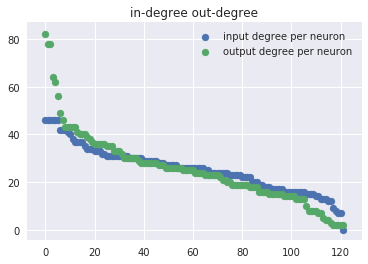

[[0 0 1 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 1 1 ..., 1 1 1]
 [0 0 1 ..., 1 1 1]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [17]:
degree_rec = [ f[0] for f in top_r ]
axis_callr = [ i for i in range(0,len(degree_rec)) ]
degree_t = [ f[0] for f in top_t ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.title('in-degree out-degree')

plt.scatter(axis_callr,degree_rec,label='input degree per neuron');
plt.scatter(axis_callt,degree_t,label='output degree per neuron');
plt.legend(loc="upper right")

plt.show()

plt.figure()



m = exc+inh
m = m.astype(int)

dg = m[0:17][:]
ca3 = m[18:42][:]
ca2 = m[43:47][:]
ca1 = m[48:87][:]
sub = m[88:90][:]
ec = m[91:122][:]

regions = [dg,ca3,ca2,ca1,sub,ec]
#import pdb
#pdb.set_trace()
print(dg)

print(dg.T)

[5, 5, 0, 6, 5, 5, 5, 5, 5, 0, 1, 1, 5, 5, 5, 5, 5, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 7, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 7, 7, 7, 17, 16, 26, 16, 16, 26, 27, 25, 26, 27, 25, 26, 27, 26, 29, 27, 18, 17, 25, 24, 27, 14, 14, 17, 16, 16, 26, 27, 26, 27, 26, 0]
122


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


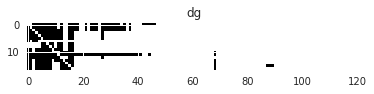

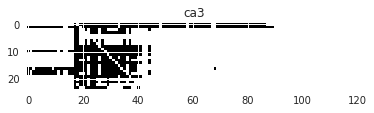

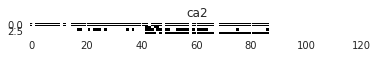

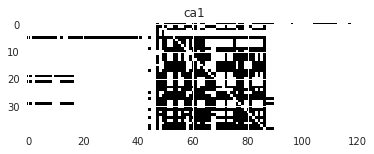

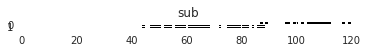

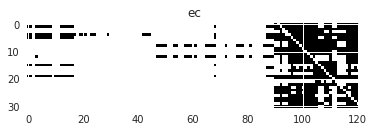

In [30]:

labels = ['dg','ca3','ca2','ca1','sub','ec']

for i,r in enumerate(regions):
    plt.figure()
    plt.title(labels[i])
    plt.imshow(r)

In [37]:
import copy

def summary_stats(x):
    print('mean',np.mean(x))
    print('std',np.std(x))
    print('max',np.max(x))
    print('min',np.min(x))
    print('sum total',np.sum(x))

for index,rr in enumerate(regions):
    outdegrees = []
    indegrees = []
    for i in rr:
        outdegrees.append(sum(i))
    for i in rr.T:
        indegrees.append(sum(i))
    
    region_label = labels[index]

    print('outputs in region \n\n\n',region_label)
    summary_stats(outdegrees)
    print('\n\n\n\n')
    
    print('inputs in region \n\n\n',region_label)
    summary_stats(indegrees)

outputs in region 


 dg
mean 17.4705882353
std 9.84059806324
max 43
min 3
sum total 297





inputs in region 


 dg
mean 2.43442622951
std 4.37576729556
max 16
min 0
sum total 297
outputs in region 


 ca3
mean 23.0
std 18.1429508809
max 82
min 2
sum total 552





inputs in region 


 ca3
mean 4.52459016393
std 6.18460955306
max 24
min 0
sum total 552
outputs in region 


 ca2
mean 37.5
std 26.7348087706
max 78
min 4
sum total 150





inputs in region 


 ca2
mean 1.22950819672
std 1.11463355182
max 4
min 0
sum total 150
outputs in region 


 ca1
mean 28.0512820513
std 12.7056392042
max 78
min 2
sum total 1094





inputs in region 


 ca1
mean 8.96721311475
std 11.7723867145
max 36
min 0
sum total 1094
outputs in region 


 sub
mean 25.5
std 7.5
max 33
min 18
sum total 51





inputs in region 


 sub
mean 0.418032786885
std 0.509582984996
max 2
min 0
sum total 51
outputs in region 


 ec
mean 27.2903225806
std 11.0692644753
max 56
min 4
sum total 846





inputs in region 


 ec


In [ ]:
top10e = top_exc[0:int(len(top_exc)/10)]
top50e = top_exc[0:int(len(top_exc)/2)]
top10i = top_inh[0:int(len(top_inh)/10)]
top50i = top_inh[0:int(len(top_inh)/2)]

In [ ]:
degree_c10e = [ f[0] for f in top10e ]
axis_c10e = [ i for i in range(0,len(degree_c10e)) ]
degree_c50e = [ f[0] for f in top50e ]
axis_c50e = [ i for i in range(0,len(degree_c50e)) ]
degree_c10i = [ f[0] for f in top10i ]
axis_c10i = [ i for i in range(0,len(degree_c10i)) ]
degree_c50i = [ f[0] for f in top50i ]
axis_c50i = [ i for i in range(0,len(degree_c50i)) ]

In [ ]:

plt.clf()
plt.title('betweenness centrality')s
plt.scatter(axis_c10e,degree_c10e,label='excitatory syn');
plt.scatter(axis_c10i,degree_c10i,label='inhibitory syn');
plt.show()

In [ ]:

plt.clf()
plt.title('betweenness centrality')
plt.scatter(axis_c50i,degree_c50i,label='inhibitory syn');
plt.scatter(axis_c50e,degree_c50e,label='excitatory syn');
plt.legend(loc="upper right")
plt.show()


In [ ]:
degree_calle = [ f[0] for f in top_exc ]
axis_calle = [ i for i in range(0,len(top_exc)) ]
degree_calli = [ f[0] for f in top_inh ]
axis_calli = [ i for i in range(0,len(top_inh)) ]
plt.scatter(axis_calle,degree_calle,label='excitatory');
plt.scatter(axis_calli,degree_calli,label='inhibitory');
plt.legend(loc="upper right")

In [ ]:
small_world_ring_excit
swm = nx.to_numpy_matrix(small_world_ring_excit)
#imshow()

In [ ]:
plt.figure()
plt.show()
plt.imshow(swm)

plt.figure()
ms = exc + inh
print(ms)
plt.imshow(ms)